# **Setting up Google Drive Connection**

In [2]:
from google.colab import drive

drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [3]:
!ls "/content/gdrive/MyDrive/CS464"

bbcsports_train.csv  bbcsports_val.csv


# **Necessary Imports**

In [65]:
import os
import sys
import seaborn as sn
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

# **Reading Datasets**

In [5]:
dataset_dir = '/content/gdrive/MyDrive/CS464/'
csv_path_train = os.path.join(dataset_dir, 'bbcsports_train.csv')
csv_path_val = os.path.join(dataset_dir, 'bbcsports_val.csv')

In [67]:
train_dataset_file = pd.read_csv(csv_path_train)
validation_dataset_file = pd.read_csv(csv_path_val)

train_dataset_arr = train_dataset_file.values

train_x = train_dataset_arr[:,:-1]
train_y = train_dataset_arr[:,-1]

validation_dataset_arr = validation_dataset_file.values
val_x = validation_dataset_arr[:, :-1]
val_y = validation_dataset_arr[:, -1]

# **Finding Frequencies and Plotting Data Distributions**

In [14]:
vocab_size = len(train_x[0])
article_count = len(train_y)

unique, counts = np.unique(train_y, return_counts=True)

category_freq = dict(zip(unique, counts))

athletics_news_count = category_freq.get(0)
cricket_news_count = category_freq.get(1)
football_news_count = category_freq.get(2)
rugby_news_count = category_freq.get(3)
tennis_news_count = category_freq.get(4)

In [8]:
print(athletics_news_count, cricket_news_count, football_news_count, rugby_news_count, tennis_news_count)

77 86 198 114 77


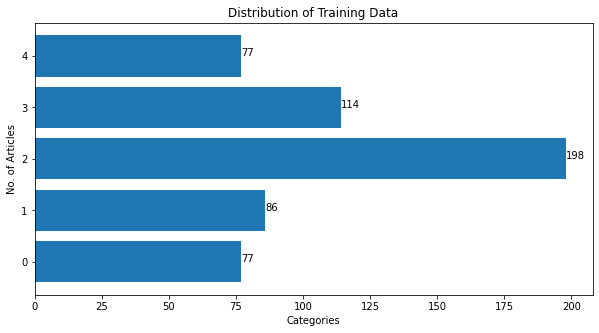

In [15]:
categories = list(category_freq.keys())
counts = list(category_freq.values())
  
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.barh(categories, counts)


plt.xlabel("Categories")
plt.ylabel("No. of Articles")
plt.title("Distribution of Training Data")
for index, value in enumerate(counts):
    plt.text(value, index,
             str(value))

plt.show()

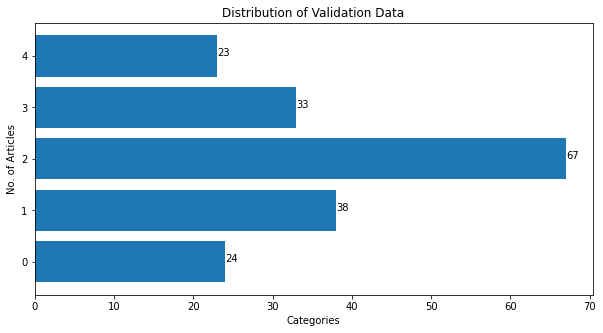

In [18]:
# For validation set
unique2, counts2 = np.unique(val_y, return_counts=True)

category_freq2 = dict(zip(unique2, counts2))

athletics_news_count2 = category_freq2.get(0)
cricket_news_count2 = category_freq2.get(1)
football_news_count2 = category_freq2.get(2)
rugby_news_count2 = category_freq2.get(3)
tennis_news_count2 = category_freq2.get(4)

categories2 = list(category_freq2.keys())
counts2 = list(category_freq2.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.barh(categories2, counts2)
 
plt.xlabel("Categories")
plt.ylabel("No. of Articles")
plt.title("Distribution of Validation Data")
for index, value in enumerate(counts2):
    plt.text(value, index,
             str(value))
plt.show()

# **Finding Estimators**

In [19]:
words_athletics = train_x[np.where(train_y == 0)[0]]
words_cricket = train_x[np.where(train_y == 1)[0]]
words_football = train_x[np.where(train_y == 2)[0]]
words_rugby = train_x[np.where(train_y == 3)[0]]
words_tennis = train_x[np.where(train_y == 4)[0]]

In [27]:
T_athletics = np.sum(words_athletics, axis=0)
T_cricket = np.sum(words_cricket, axis=0)
T_football = np.sum(words_football, axis=0)
T_rugby = np.sum(words_rugby, axis=0)
T_tennis = np.sum(words_tennis, axis=0)

theta_athletics = T_athletics / T_athletics.sum()
theta_cricket = T_cricket / T_cricket.sum()
theta_football = T_football / T_football.sum()
theta_rugby = T_rugby / T_rugby.sum()
theta_tennis = T_tennis / T_tennis.sum()

In [21]:
athletics_prob = athletics_news_count / article_count
cricket_prob = cricket_news_count / article_count
football_prob = football_news_count / article_count
rugby_prob = rugby_news_count / article_count
tennis_prob = tennis_news_count / article_count

# **Predictions without MAP**

In [43]:
def predictLabelGivenArticle(label_probability, train_data, theta, index):
  estimate_label = np.nan_to_num(np.log(label_probability))

  for i in range(train_data.shape[1]): # all words in article
    if(theta[i] == 0):
      estimate_label += np.nan_to_num(train_data[index][i] * -np.inf)
    else:
      estimate_label += train_data[index][i] * np.log(theta[i])
  return estimate_label

In [53]:
def findMax(a, b, c, d, e):
  l = []
  l.extend((a, b, c, d, e))
  max = np.nan_to_num(-np.inf)
  index = 0;

  for i in range(len(l)):
    if(l[i] >= max):
        max = l[i]
        index = i
      
  return index

In [41]:
def predictLabel(i):
  return findMax(predictLabelGivenArticle(athletics_prob, val_x, theta_athletics,  i),
                 predictLabelGivenArticle(cricket_prob, val_x, theta_cricket,  i),
                 predictLabelGivenArticle(football_prob, val_x, theta_football,  i),
                 predictLabelGivenArticle(rugby_prob, val_x, theta_rugby,  i),
                 predictLabelGivenArticle(tennis_prob, val_x, theta_tennis,  i))

In [55]:
predictions = np.array([predictLabel(i) for i in range (val_x.shape[0])])
print(predictions)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  


[0 0 0 0 4 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 3 0 0
 0 2 1 2 0 0 4 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 4 0 0 2 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 4 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 2 1 0 0 0 0 0 0 0 0 0 0 1 1 0 2
 0 0 0 0 0 0 0 2 0 0 3 0 0 0 0 2 0 0 0 0 2 0 3 0 0 1 0 0 0 0 0 2 2 0 0 0 2
 0 0 0 0 0 2 0 0 0 2 2 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# **Predictions with Maximum a Posteriori**

In [45]:
# MAP Estimator where alpha = 1
alpha = 1
T_athletics_as = np.sum(words_athletics, axis=0) + alpha
T_cricket_as = np.sum(words_cricket, axis=0) + alpha
T_football_as = np.sum(words_football, axis=0) + alpha
T_rugby_as = np.sum(words_rugby, axis=0) + alpha
T_tennis_as = np.sum(words_tennis, axis=0) + alpha

theta_athletics_as = T_athletics_as / (T_athletics.sum()  + (alpha * train_x.shape[1]))
theta_cricket_as = T_cricket_as / (T_cricket.sum() + (alpha * train_x.shape[1]))
theta_football_as = T_football_as / (T_football.sum() + (alpha * train_x.shape[1]))
theta_rugby_as = T_rugby_as / (T_rugby.sum() + (alpha * train_x.shape[1]))
theta_tennis_as = T_tennis_as / (T_tennis.sum() + (alpha * train_x.shape[1]))

In [31]:
def predictLabelAPriori(i):
  return findMax(predictLabelGivenArticle(athletics_prob, val_x, theta_athletics_as,  i),
                 predictLabelGivenArticle(cricket_prob, val_x, theta_cricket_as,  i),
                 predictLabelGivenArticle(football_prob, val_x, theta_football_as,  i),
                 predictLabelGivenArticle(rugby_prob, val_x, theta_rugby_as,  i),
                 predictLabelGivenArticle(tennis_prob, val_x, theta_tennis_as, i))

In [56]:
predictions_a_priori = np.array([predictLabelAPriori(i) for i in range(val_x.shape[0])])
print(predictions_a_priori)

[4 2 1 2 4 0 0 1 2 2 1 3 3 1 0 3 1 2 3 3 3 1 2 1 3 2 3 4 3 2 3 2 1 1 3 2 2
 1 2 1 2 0 1 4 3 4 4 4 2 2 2 4 2 4 0 1 0 1 2 4 0 0 2 0 3 2 1 0 2 3 0 4 0 0
 3 1 2 2 4 2 2 2 2 2 3 4 2 2 4 0 2 0 2 4 3 2 1 1 0 1 2 2 2 1 2 1 1 1 1 3 2
 1 4 0 3 2 2 3 2 2 1 3 0 1 2 3 2 3 1 1 4 2 1 3 4 3 1 2 2 3 2 3 2 2 4 3 0 2
 3 4 3 3 3 2 1 2 0 2 2 2 0 3 2 2 3 2 2 1 2 0 3 1 1 2 0 0 4 2 2 3 2 0 4 2 2]


# **Confusion Matrices**

In [66]:
no_smoothing = pd.DataFrame({'Predicted' : predictions}) 
apriori = pd.DataFrame({'Predicted' : predictions_a_priori})

actual = pd.DataFrame({'Actual' : val_y})

confusion_matrix = pd.crosstab(no_smoothing.Predicted, actual.Actual)
confusion_matrix2 = pd.crosstab(apriori.Predicted, actual.Actual)

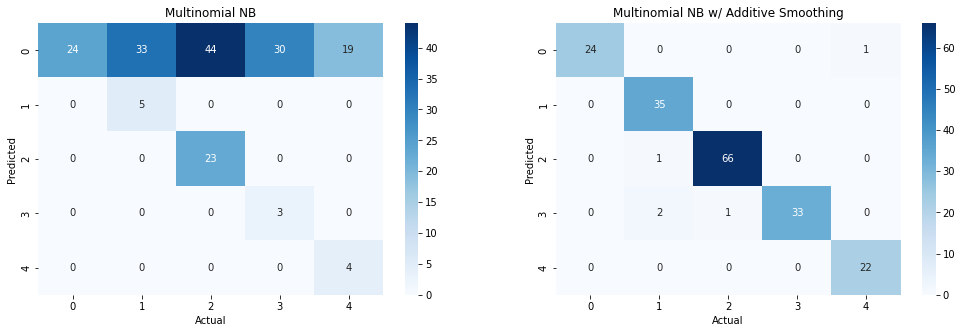

In [62]:
fig = plt.figure(figsize=(17,5))
ax1 = plt.subplot(121)
ax1.set_title("Multinomial NB")
sn.heatmap(confusion_matrix, annot=True, cmap='Blues')

ax2 = plt.subplot(122)
ax2.set_title("Multinomial NB w/ Additive Smoothing")
sn.heatmap(confusion_matrix2, annot=True, cmap='Blues')

**Calculating Accuracies**

In [63]:
accuracy_mnb = np.diag(confusion_matrix).sum()/confusion_matrix.sum().sum()

accuracy_mnb_was = np.diag(confusion_matrix2).sum()/confusion_matrix2.sum().sum()

print("Accuracy for Multinomial Naive Bayes without MAP", accuracy_mnb,
      "\nAccuracy for Multinomial Naive Bayes with Additional Smoothing", accuracy_mnb_was)

Accuracy for Multinomial Naive Bayes without MAP 0.31891891891891894 
Accuracy for Multinomial Naive Bayes with Additional Smoothing 0.972972972972973
